___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
import sklearn

In [4]:
sklearn.__version__  # 1.2.2 <--- Some packages are not compatible with newer versions
#!pip install scikit-learn==1.2.2

'1.2.2'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
# import dataframes
df_male = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [6]:
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [7]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


## Explore Data

In [8]:
df_copy.describe()

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,SubjectId
count,6068.000,4082.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,...,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,1986.000
mean,1697.499,20003.371,246.469,1406.161,327.374,224.891,1299.609,244.193,194.755,399.204,340.934,274.735,490.754,72.253,324.897,...,460.525,317.750,914.501,229.674,377.004,1031.501,79.709,169.003,830.060,17.515,1.615,29.761,68.257,174.750,22306.606
std,1133.004,6568.435,37.400,79.091,20.720,16.052,72.022,16.845,13.516,30.237,41.520,19.221,42.136,5.345,17.088,...,36.678,36.363,114.275,35.613,31.618,62.702,15.653,13.125,47.651,550.950,0.979,8.675,3.862,33.692,20904.730
min,0.000,10027.000,155.000,1115.000,249.000,156.000,1038.000,186.000,151.000,283.000,216.000,197.000,357.000,55.000,267.000,...,345.000,211.000,611.000,138.000,289.000,805.000,35.800,124.000,672.000,1.000,1.000,17.000,56.000,0.000,10037.000
25%,758.000,14270.250,219.000,1350.000,313.000,214.000,1249.000,232.000,185.000,376.000,311.000,262.000,460.000,68.000,314.000,...,435.000,292.000,829.000,203.000,355.000,988.000,68.200,159.000,797.000,1.000,1.000,23.000,66.000,150.000,17667.000
50%,1516.500,17236.500,242.000,1410.000,328.000,225.000,1302.000,245.000,195.000,404.000,341.000,274.000,492.000,72.000,326.000,...,463.000,316.000,907.000,226.000,375.000,1033.000,78.500,170.000,830.000,1.000,1.000,28.000,68.000,173.000,22096.500
75%,2564.250,27315.750,271.000,1462.000,341.250,235.000,1349.000,256.000,204.000,421.000,370.000,288.000,520.000,76.000,336.000,...,486.000,343.000,992.000,252.250,398.000,1076.000,89.600,179.000,863.000,2.000,2.000,36.000,71.000,196.000,26089.750
max,4081.000,29452.000,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,362.000,637.000,91.000,385.000,...,598.000,461.000,1379.000,406.000,494.000,1245.000,144.200,216.000,1009.000,42351.000,8.000,58.000,94.000,321.000,920103.000


In [9]:
df_copy.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [10]:
df_copy["WritingPreference"].value_counts()

Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: WritingPreference, dtype: int64

In [11]:
df_copy["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [12]:
df_copy = df_copy.drop(
    [

        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "subjectid",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)

# "SubjectsBirthLocation"
# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

In [13]:
# Look for DODRace with >= 500 observations
df_copy.groupby("DODRace").count()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Ethnicity,Age,WritingPreference
DODRace,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,...,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,229,3792,3792
2,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,...,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,220,1298,1298
3,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,...,679,679,679,679,679,679,679,679,679,679,679,679,676,679,679
4,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
5,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49,49,49,46,49,49
6,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [14]:
# Just DODRace with > 500 observations
df_copy = df_copy.query("DODRace in [1, 2, 3]")
df_copy.groupby("DODRace").count()
df_copy

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Ethnicity,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,...,501,329,933,240,440,1054,81.500,175,853,Male,North Dakota,NaN,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,...,432,316,870,225,371,1054,72.600,167,815,Male,New York,NaN,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,...,472,329,964,255,411,1041,92.900,180,831,Male,New York,NaN,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,...,461,315,857,205,399,968,79.400,176,793,Male,Wisconsin,NaN,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,...,467,303,868,214,379,1245,94.600,188,954,Male,North Carolina,NaN,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,...,447,334,1043,265,370,1002,83.200,162,836,Female,Texas,Mexican,3,51,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,...,446,334,971,243,374,958,71.700,157,804,Female,Texas,Mexican,3,40,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,...,444,335,982,254,351,970,76.200,159,774,Female,Texas,NaN,2,40,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,...,450,298,837,208,335,952,63.200,146,769,Female,Texas,Mexican,3,31,Right hand


In [15]:
df_copy["DODRace"] = df_copy.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [16]:
df_copy["DODRace"].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [17]:
# The is better to detect each missings with its cirrospending features

null_values = []

# Iterate over each column in the DataFrame
for col in df.columns:
    # Calculate the number of null values in the column
    null_count = df[col].isnull().sum()
    # Append the null count to the list
    null_values.append(null_count)

# Convert the list to a numpy array
null_array = np.array(null_values)

# Print the array of null values
print(null_array)

[   0 1986    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0 4647    0    0    0    0    0 4082]


In [18]:
df

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,...,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,...,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,...,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
6064,1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand,29502.000
6065,1983,NaN,260,1334,318,213,1259,234,183,363,332,299,460,70,317,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand,29503.000
6066,1984,NaN,205,1293,302,199,1207,213,163,376,276,280,426,62,282,...,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand,29511.000


In [19]:
df_copy['Ethnicity'].isnull().sum()

4644

In [20]:
df_copy['Ethnicity'].fillna('Missing', inplace=True)

In [21]:
df_copy['Ethnicity'].value_counts().sum()

5769

In [139]:
df_copy['Ethnicity'].value_counts()

Missing                                      4644
Mexican                                       356
Puerto Rican                                  183
Caribbean Islander                            123
Cherokee                                       60
                                             ... 
Blackfoot Caribbean Islander Puerto Rican       1
Cuban Unreadable Native American Tribe          1
Ute                                             1
Mexican Zuni                                    1
Apache Blackfoot Cherokee Crow                  1
Name: Ethnicity, Length: 158, dtype: int64

In [23]:
df_copy['DODRace'].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [24]:
# Check duplicates
df.duplicated().sum()

0

In [25]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)

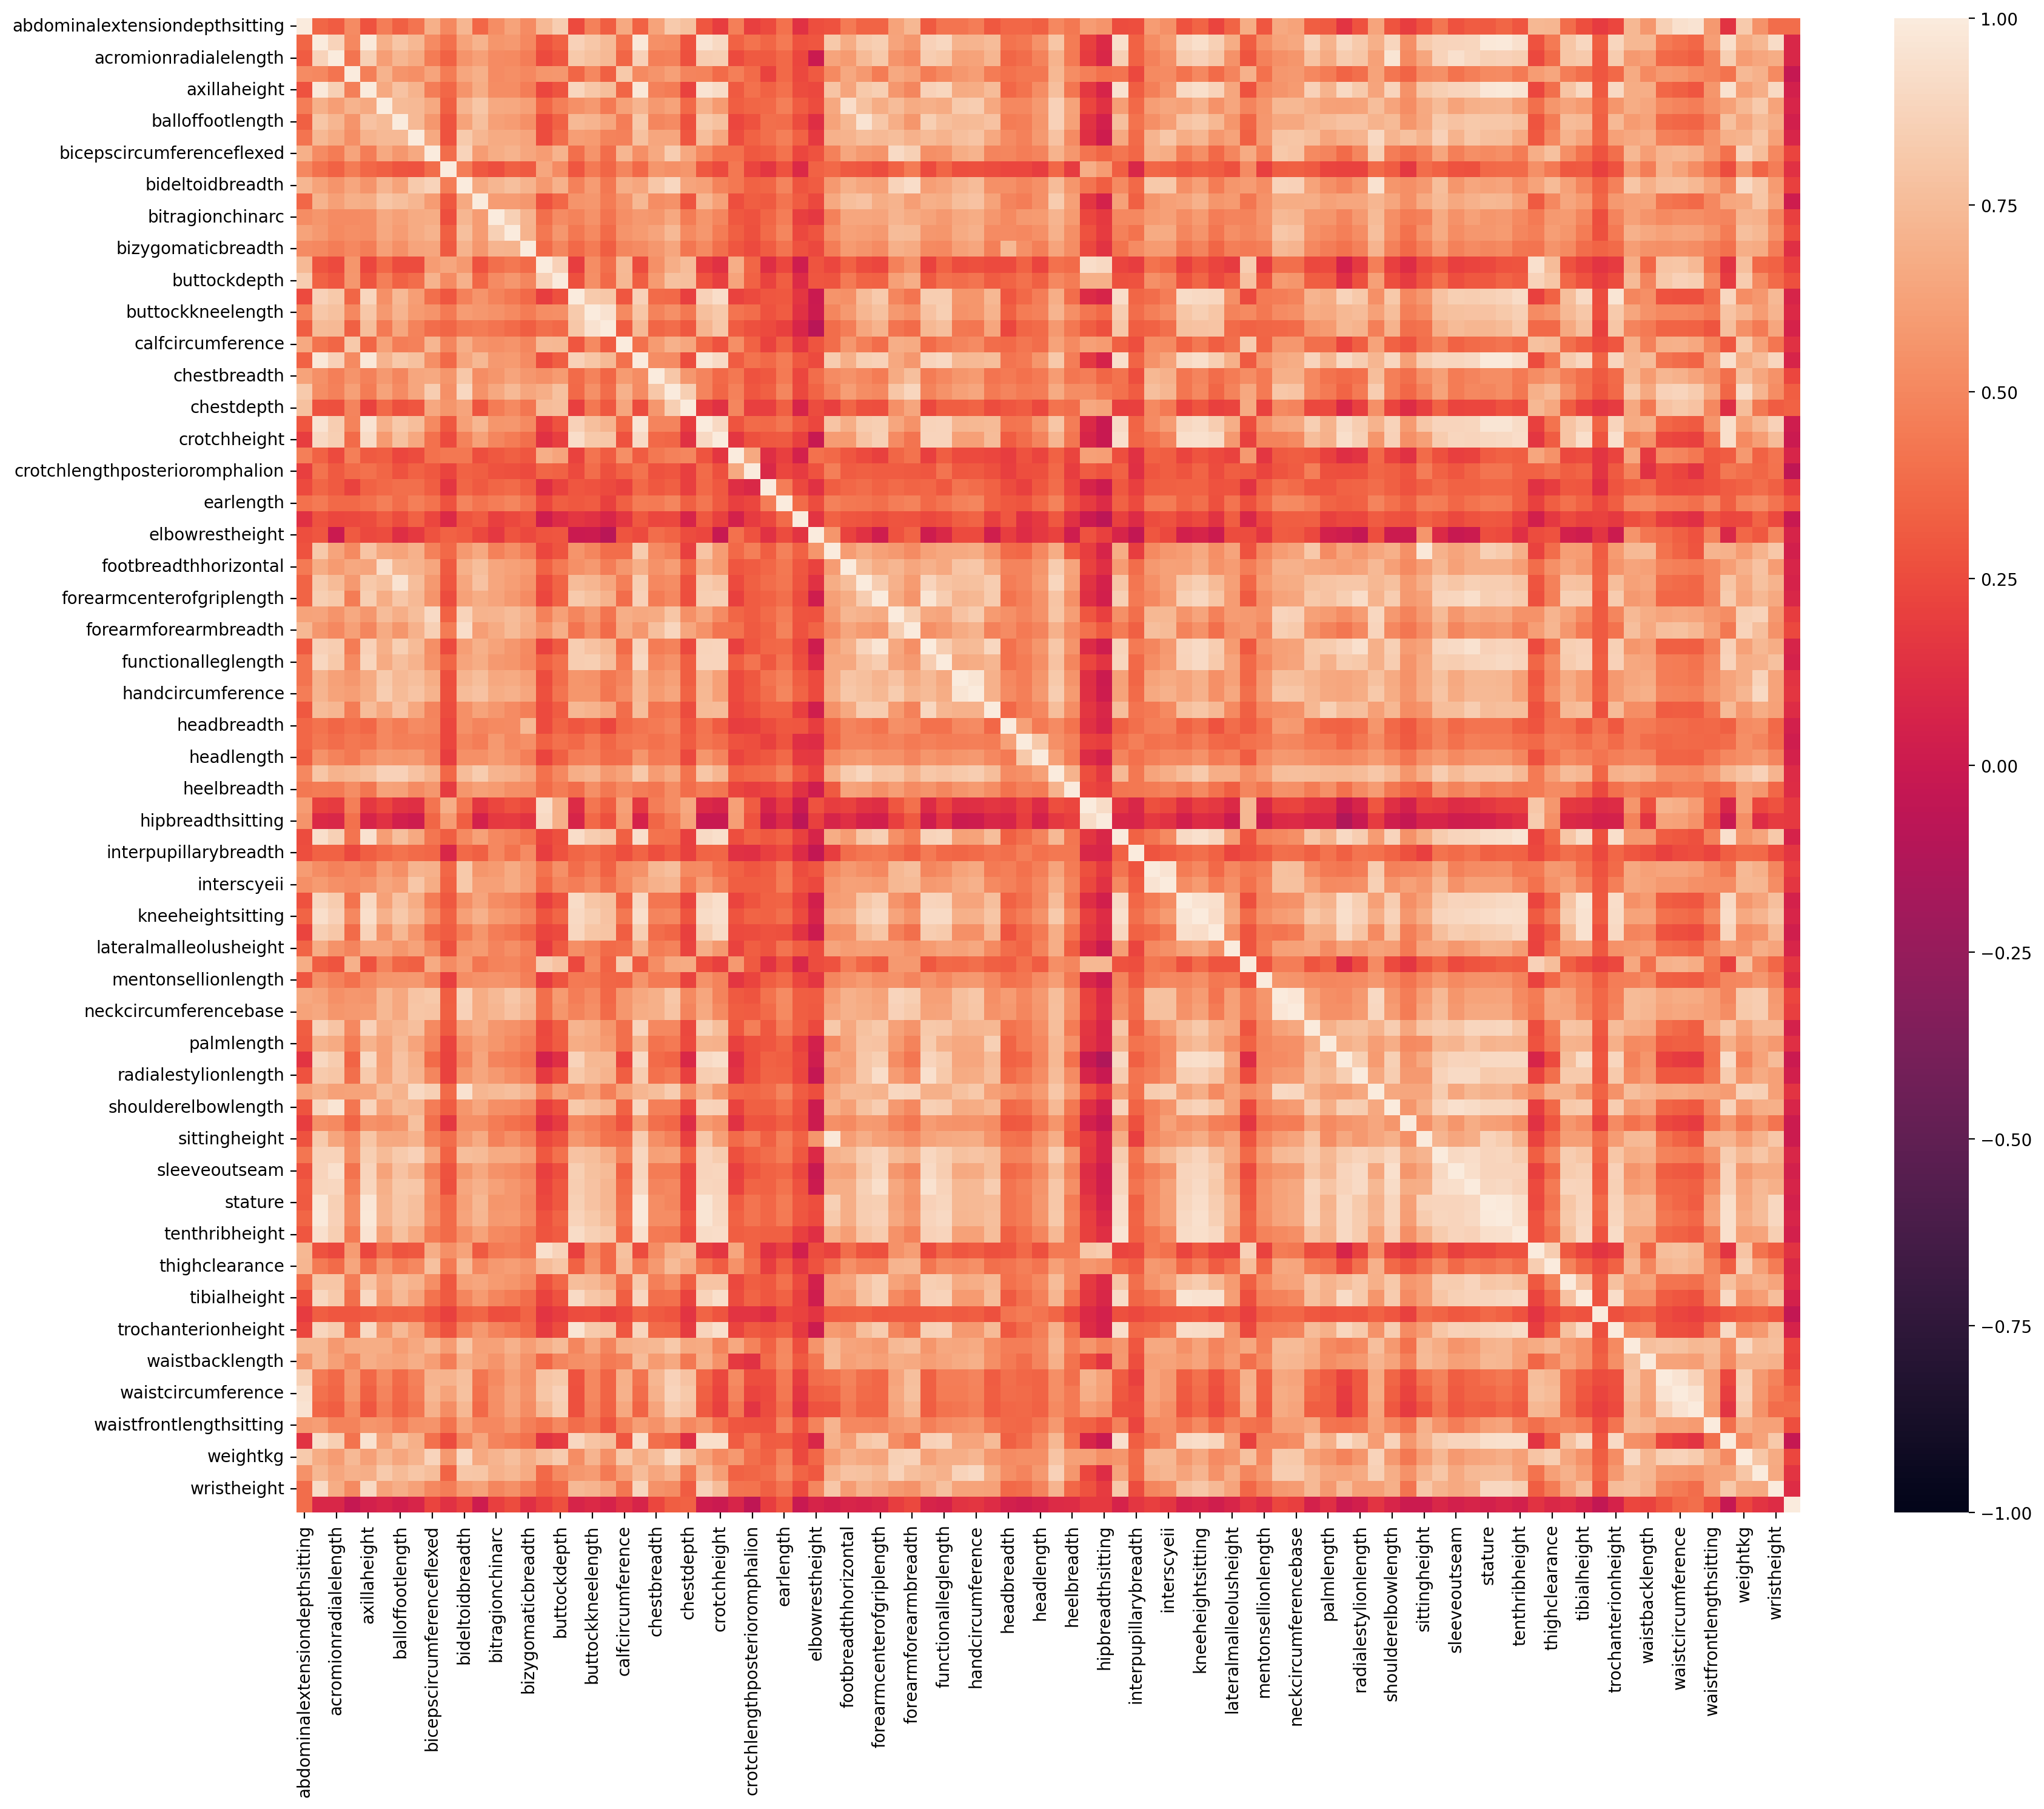

In [26]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_copy.corr(numeric_only=True), vmin=-1, vmax=1);

In [27]:
df_copy.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Columns: 99 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: float64(1), int64(93), object(5)
memory usage: 4.4+ MB


In [28]:
df_copy.shape

(5769, 99)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [29]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [30]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation", "Ethnicity"]

In [31]:
import sklearn

In [32]:
sklearn.__version__  # 1.3.1

'1.2.2'

In [33]:
# !conda install --upgrade sklearn #<--- If it doesn't work, try the one below
# !pip install --upgrade sklearn
# !pip install -U scikit-learn

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [35]:
df_copy.shape

(5769, 99)

In [36]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [37]:
y_train

5165    White
5393    White
5659    White
3628    White
2914    White
        ...  
5346    White
4192    White
887     White
3891    White
5015    White
Name: DODRace, Length: 4615, dtype: object

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model
class weight__


### Vanilla Logistic Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[241   5  14]
 [  3 115  18]
 [  8   6 744]]
              precision    recall  f1-score   support

       Black       0.96      0.93      0.94       260
    Hispanic       0.91      0.85      0.88       136
       White       0.96      0.98      0.97       758

    accuracy                           0.95      1154
   macro avg       0.94      0.92      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[ 990    5   43]
 [   3  534    6]
 [  24   27 2983]]
              precision    recall  f1-score   support

       Black       0.97      0.95      0.96      1038
    Hispanic       0.94      0.98      0.96       543
       White       0.98      0.98      0.98      3034

    accuracy                           0.98      4615
   macro avg       0.97      0.97      0.97      4615
weighted avg       0.98      0.98      0.98      4615



### LR with Over sampling and under samlping

In [42]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [43]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline

lr = LogisticRegression(C=10, solver='saga')

# Define RandomOverSampler
ros = RandomOverSampler(random_state=42, sampling_strategy={"Hispanic": 1500, "Black": 1500})

# Add RandomOverSampler to your pipeline
operations = [("encoder", column_trans), ("scaler", sc), ("ros", ros), ("logistic", lr)]

pipe_model_ros = Pipeline(steps=operations)

pipe_model_ros.fit(X_train, y_train)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy={'Black': 1500,
                                                      'Hispanic': 1500})),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [44]:
eval_metric(pipe_model_ros, X_train, y_train, X_test, y_test)

Test_Set
[[240   6  14]
 [  2 124  10]
 [ 12   8 738]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93       260
    Hispanic       0.90      0.91      0.91       136
       White       0.97      0.97      0.97       758

    accuracy                           0.95      1154
   macro avg       0.94      0.94      0.94      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[ 979   15   44]
 [   2  539    2]
 [  42   45 2947]]
              precision    recall  f1-score   support

       Black       0.96      0.94      0.95      1038
    Hispanic       0.90      0.99      0.94       543
       White       0.98      0.97      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.95      0.97      0.96      4615
weighted avg       0.97      0.97      0.97      4615



### Under Sampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# Define RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={"White": 1000})

# Add RandomUnderSampler to your pipeline
operations = [("encoder", column_trans), ("scaler", sc), ("rus", rus), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rus', RandomUnderSampler(sampling_strategy={'White': 1000})),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [46]:
eval_metric(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[244   7   9]
 [  2 127   7]
 [ 23  13 722]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       260
    Hispanic       0.86      0.93      0.90       136
       White       0.98      0.95      0.97       758

    accuracy                           0.95      1154
   macro avg       0.92      0.94      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[1000   12   26]
 [   4  537    2]
 [  95   83 2856]]
              precision    recall  f1-score   support

       Black       0.91      0.96      0.94      1038
    Hispanic       0.85      0.99      0.91       543
       White       0.99      0.94      0.97      3034

    accuracy                           0.95      4615
   macro avg       0.92      0.96      0.94      4615
weighted avg       0.96      0.95      0.95      4615



Results before using 'Ethnicity'

Test
<br>


              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.77      0.61       136
       White       0.95      0.87      0.91       758
    accuracy       -         -         0.86      1154

   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154



---
Train


              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.56      0.85      0.67       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615

### Cross validation

In [47]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc),  ("ros", ros), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   5.913
score_time                 0.040
test_accuracy              0.944
train_accuracy             0.969
test_precision_weighted    0.945
train_precision_weighted   0.970
test_recall_weighted       0.944
train_recall_weighted      0.969
test_f1_weighted           0.944
train_f1_weighted          0.969
dtype: float64

In [48]:
eval_metric(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[244   7   9]
 [  2 127   7]
 [ 23  13 722]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       260
    Hispanic       0.86      0.93      0.90       136
       White       0.98      0.95      0.97       758

    accuracy                           0.95      1154
   macro avg       0.92      0.94      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[1000   12   26]
 [   4  537    2]
 [  95   83 2856]]
              precision    recall  f1-score   support

       Black       0.91      0.96      0.94      1038
    Hispanic       0.85      0.99      0.91       543
       White       0.99      0.94      0.97      3034

    accuracy                           0.95      4615
   macro avg       0.92      0.96      0.94      4615
weighted avg       0.96      0.95      0.95      4615



In [49]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels=["Hispanic"])
recall_hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [50]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   5.473
score_time                 0.046
test_f1_hispanic           0.886
train_f1_hispanic          0.945
test_precision_hispanic    0.872
train_precision_hispanic   0.911
test_recall_hispanic       0.902
train_recall_hispanic      0.981
dtype: float64

In [51]:
eval_metric(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[244   7   9]
 [  2 127   7]
 [ 23  13 722]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92       260
    Hispanic       0.86      0.93      0.90       136
       White       0.98      0.95      0.97       758

    accuracy                           0.95      1154
   macro avg       0.92      0.94      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[1000   12   26]
 [   4  537    2]
 [  95   83 2856]]
              precision    recall  f1-score   support

       Black       0.91      0.96      0.94      1038
    Hispanic       0.85      0.99      0.91       543
       White       0.99      0.94      0.97      3034

    accuracy                           0.95      4615
   macro avg       0.92      0.96      0.94      4615
weighted avg       0.96      0.95      0.95      4615



### Logistic Model GridsearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [1, 10],
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear"],
    "logistic__class_weight": ["balanced"],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True
)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
grid_search.best_estimator_

In [ ]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

In [ ]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

# Class weight for logisticRegression Model


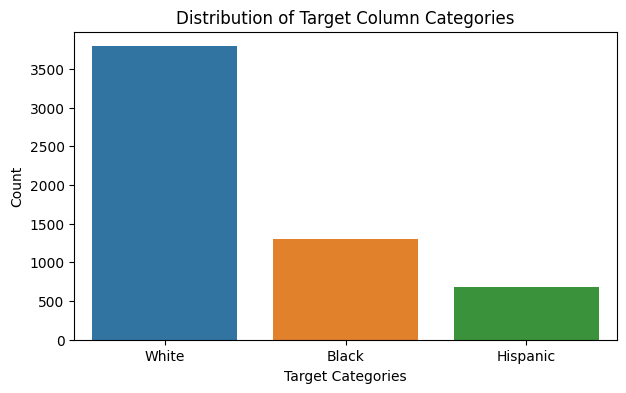

In [54]:
# demonstrate the target column distribution
sns.countplot(x="DODRace", data=df_copy)
plt.title("Distribution of Target Column Categories")
plt.xlabel("Target Categories")
plt.ylabel("Count")
plt.show()

In [55]:
# converting the dependent variable to float
df["DODRace"] = df["DODRace"].astype(float)

In [56]:
# Try to maximize the Recall score by balance the data
lr = LogisticRegression(C=10, solver="saga", class_weight="balanced")

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_balanced = Pipeline(steps=operations)

pipe_model_balanced.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='saga'))])

In [57]:
eval_metric(pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[243   6  11]
 [  3 127   6]
 [ 17   9 732]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93       260
    Hispanic       0.89      0.93      0.91       136
       White       0.98      0.97      0.97       758

    accuracy                           0.95      1154
   macro avg       0.93      0.94      0.94      1154
weighted avg       0.96      0.95      0.96      1154


Train_Set
[[ 998   15   25]
 [   3  538    2]
 [  76   48 2910]]
              precision    recall  f1-score   support

       Black       0.93      0.96      0.94      1038
    Hispanic       0.90      0.99      0.94       543
       White       0.99      0.96      0.97      3034

    accuracy                           0.96      4615
   macro avg       0.94      0.97      0.95      4615
weighted avg       0.97      0.96      0.96      4615



In [58]:
# change the class_weight to None

lr = LogisticRegression(C=10, solver="saga", class_weight=None)

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_None = Pipeline(steps=operations)

pipe_model_None.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [59]:
eval_metric(pipe_model_None, X_train, y_train, X_test, y_test)

Test_Set
[[240   5  15]
 [  2 122  12]
 [ 11   8 739]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94       260
    Hispanic       0.90      0.90      0.90       136
       White       0.96      0.97      0.97       758

    accuracy                           0.95      1154
   macro avg       0.94      0.93      0.94      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[ 967   14   57]
 [   6  532    5]
 [  28   40 2966]]
              precision    recall  f1-score   support

       Black       0.97      0.93      0.95      1038
    Hispanic       0.91      0.98      0.94       543
       White       0.98      0.98      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.95      0.96      0.96      4615
weighted avg       0.97      0.97      0.97      4615



In [63]:
# Using the ClusterCentroids to balance the target column in training data
from collections import Counter

from imblearn.under_sampling import ClusterCentroids

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

[('Black', 543), ('Hispanic', 543), ('White', 543)]


In [ ]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

In [ ]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [ ]:
eval_metric_(lr_resampled, X_resampled, y_resampled, X_test, y_test)

In [67]:
# Using the ClusterCentroids to balance the target column for testing data
from collections import Counter

from imblearn.under_sampling import ClusterCentroids

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test)

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
X_resampled_test, y_resampled_test = cc.fit_resample(X_test_encoded, y_test)
print(sorted(Counter(y_resampled_test).items()))
# reset_index

[('Black', 136), ('Hispanic', 136), ('White', 136)]


In [68]:
def eval_metric_balanced(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_resampled_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [69]:
eval_metric_balanced(
    lr_resampled, X_resampled, y_resampled, X_resampled_test, y_resampled_test
)

Test_Set
[[111  17   8]
 [ 13  93  30]
 [  2  37  97]]
              precision    recall  f1-score   support

       Black       0.88      0.82      0.85       136
    Hispanic       0.63      0.68      0.66       136
       White       0.72      0.71      0.72       136

    accuracy                           0.74       408
   macro avg       0.74      0.74      0.74       408
weighted avg       0.74      0.74      0.74       408


Train_Set
[[463  47  33]
 [ 64 346 133]
 [ 11 128 404]]
              precision    recall  f1-score   support

       Black       0.86      0.85      0.86       543
    Hispanic       0.66      0.64      0.65       543
       White       0.71      0.74      0.73       543

    accuracy                           0.74      1629
   macro avg       0.74      0.74      0.74      1629
weighted avg       0.74      0.74      0.74      1629



## 2. SVC


### Vanilla SVC model

In [70]:
from sklearn.svm import SVC



operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[228   9  23]
 [  1 122  13]
 [  7   6 745]]
              precision    recall  f1-score   support

       Black       0.97      0.88      0.92       260
    Hispanic       0.89      0.90      0.89       136
       White       0.95      0.98      0.97       758

    accuracy                           0.95      1154
   macro avg       0.94      0.92      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[ 937   21   80]
 [   2  538    3]
 [  15   46 2973]]
              precision    recall  f1-score   support

       Black       0.98      0.90      0.94      1038
    Hispanic       0.89      0.99      0.94       543
       White       0.97      0.98      0.98      3034

    accuracy                           0.96      4615
   macro avg       0.95      0.96      0.95      4615
weighted avg       0.97      0.96      0.96      4615



In [71]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.879
train_f1_hispanic          0.938
test_precision_hispanic    0.867
train_precision_hispanic   0.892
test_recall_hispanic       0.893
train_recall_hispanic      0.990
dtype: float64

In [ ]:
#SVM with balancing

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

###  SVC Model GridsearchCV

In [ ]:
param_grid = {'SVC__C': [0.01, 0.03, 0.02, 0.1],
               'SVC__gamma': [0.03,0.01 ,0.1],
#               'SVC__kernel': ['rbf', 'linear'],
#               'SVC__class_weight': ["balanced", None]
#               'SVC__degree':[2,3]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC())]
SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(SVM_pipe_model,
                              param_grid,
                              n_jobs=-1,
                              scoring=recall_hispanic,
                              cv=10,
                              return_train_score=True,
                              verbose=2)

In [ ]:
SVM_pipe_model_grid.fit(X_train, y_train)

In [76]:
SVM_pipe_model_grid.best_estimator_

AttributeError: ignored

In [ ]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

In [ ]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model_grid,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## 3. RF


### Vanilla RF Model

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [78]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[187   4  69]
 [  4 105  27]
 [  7   8 743]]
              precision    recall  f1-score   support

       Black       0.94      0.72      0.82       260
    Hispanic       0.90      0.77      0.83       136
       White       0.89      0.98      0.93       758

    accuracy                           0.90      1154
   macro avg       0.91      0.82      0.86      1154
weighted avg       0.90      0.90      0.89      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [79]:
# from sklearn.ensemble import RandomForestClassifier

# RF = RandomForestClassifier()

# operations = [("encoder", column_trans), ("RF", RF)]

# rf_model = Pipeline(steps=operations)

# rf_model.fit(X_train, y_train)


# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

### RF Model GridsearchCV

In [87]:
param_grid = {'RF_model__n_estimators':[50, 64],
             'RF_model__max_features':[2, 4,],
             'RF_model__max_depth':[2, 3],
             'RF_model__min_samples_split':[2, 3],
             'RF_model__min_samples_leaf': [2,3],
             'RF_model__max_samples':[0.8, 1]}

In [88]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [89]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation',
                                                                          'Ethnicity'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': [2, 4],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3],
                         'RF_model__min_samples_split': [2, 3],
                         'RF_model__n_estimators': [50, 64]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [91]:
rf_grid_model.best_estimator_
'''(class_weight='balanced', max_depth=3, max_features=4,
                       max_samples=0.8, min_samples_leaf=2, n_estimators=50,
                       random_state=101)'''

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features=4, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [92]:
rf_grid_model.best_score_

0.7954638124362894

In [93]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[195  33  32]
 [  5 121  10]
 [111 179 468]]
              precision    recall  f1-score   support

       Black       0.63      0.75      0.68       260
    Hispanic       0.36      0.89      0.52       136
       White       0.92      0.62      0.74       758

    accuracy                           0.68      1154
   macro avg       0.64      0.75      0.65      1154
weighted avg       0.79      0.68      0.70      1154


Train_Set
[[ 807   96  135]
 [  23  475   45]
 [ 447  608 1979]]
              precision    recall  f1-score   support

       Black       0.63      0.78      0.70      1038
    Hispanic       0.40      0.87      0.55       543
       White       0.92      0.65      0.76      3034

    accuracy                           0.71      4615
   macro avg       0.65      0.77      0.67      4615
weighted avg       0.79      0.71      0.72      4615



## 4. XGBoost All Features


### Vanilla XGBoost Model

In [94]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms
cat_ordinal = ["Gender", "WritingPreference", "SubjectsBirthLocation", "Ethnicity"]

In [95]:
df_copy["SubjectsBirthLocation"].nunique()

136

In [96]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), cat_ordinal),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [97]:
df_copy.shape

(5769, 99)

In [98]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_copy.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [99]:
df_copy["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [100]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [101]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               cols...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [103]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[221   7  32]
 [  3 117  16]
 [  7  10 741]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       260
           1       0.87      0.86      0.87       136
           2       0.94      0.98      0.96       758

    accuracy                           0.94      1154
   macro avg       0.92      0.90      0.91      1154
weighted avg       0.94      0.94      0.93      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



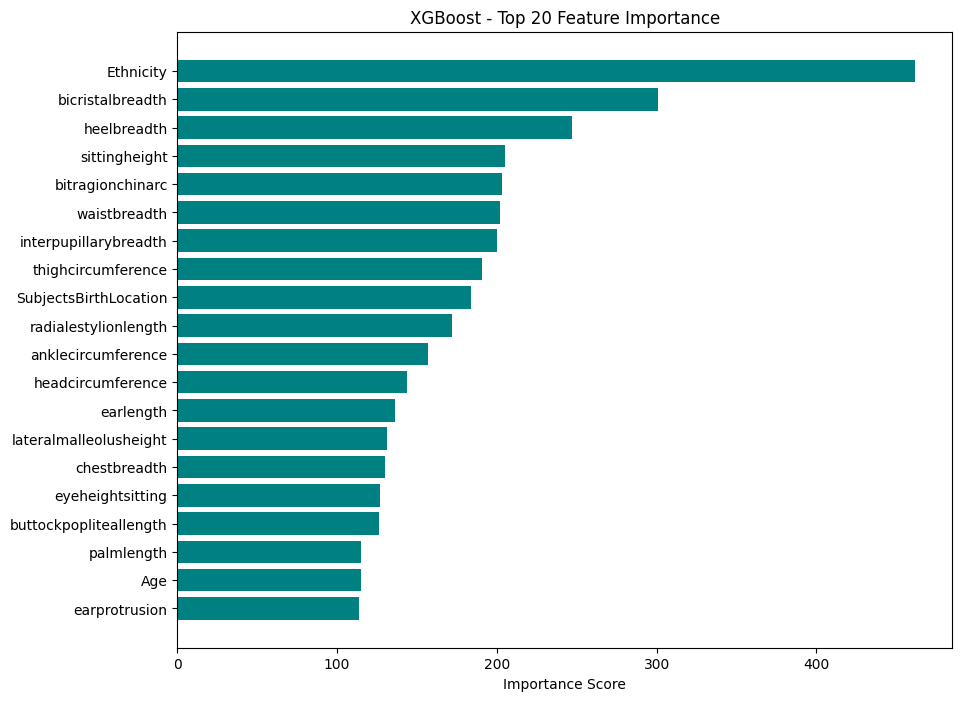

In [104]:
feature_importances = xgb_classifier.get_booster().get_score(importance_type='weight')
sorted_feature_importance = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:20], importance[:20], color='teal')
plt.title('XGBoost - Top 20 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### CV XGBoost Model

In [105]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [106]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   3.023
score_time                 0.037
test_f1_hispanic           0.857
train_f1_hispanic          1.000
test_precision_hispanic    0.839
train_precision_hispanic   1.000
test_recall_hispanic       0.877
train_recall_hispanic      1.000
dtype: float64

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [108]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[221   7  32]
 [  3 117  16]
 [  7  10 741]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       260
           1       0.87      0.86      0.87       136
           2       0.94      0.98      0.96       758

    accuracy                           0.94      1154
   macro avg       0.92      0.90      0.91      1154
weighted avg       0.94      0.94      0.93      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [109]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])

scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [110]:
from sklearn.model_selection import cross_val_score, cross_validate


pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   7.446
score_time                 0.038
test_f1_hispanic           0.857
train_f1_hispanic          1.000
test_precision_hispanic    0.839
train_precision_hispanic   1.000
test_recall_hispanic       0.877
train_recall_hispanic      1.000
dtype: float64

#### GridSearch

In [111]:
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5,  1],
              "xgboost__colsample_bytree":[0.5, 1],
             "xgboost__reg_alpha": [0, 0.5],
}

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate


# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])


param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True, verbose=2, )
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.5s
[CV] END xgboost__colsample_bytre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation',
                                                                          'Ethnicity'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      boos...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.5],
                         'xgboost__subsample': [0.5, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [113]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               cols...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [114]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.899
mean_train_score   0.958
Name: 35, dtype: object

In [115]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[190   9  61]
 [  5 121  10]
 [ 11  11 736]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       260
           1       0.86      0.89      0.87       136
           2       0.91      0.97      0.94       758

    accuracy                           0.91      1154
   macro avg       0.90      0.86      0.88      1154
weighted avg       0.91      0.91      0.90      1154


Train_Set
[[ 814   32  192]
 [   8  521   14]
 [  31   76 2927]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1038
           1       0.83      0.96      0.89       543
           2       0.93      0.96      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.91      0.90      0.90      4615
weighted avg       0.93      0.92      0.92      4615



#### Random Serach

In [118]:

# Define the hyperparameter space
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# param_grid = {
#     "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
#     "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
#     "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
#     "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
#     "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
#     "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
#     "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
# }

param_grid = {
    "xgboost__n_estimators":np.arange(3,100, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.1,3, step=0.5),    # float             # float
}

xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=40,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END xgboost__learning_rate=2.6, xgboost__max_depth=6, xgboost__n_estimators=4; total time=   0.3s
[CV] END xgboost__learning_rate=2.6, xgboost__max_depth=6, xgboost__n_estimators=4; total time=   0.3s
[CV] END xgboost__learning_rate=2.6, xgboost__max_depth=6, xgboost__n_estimators=4; total time=   0.3s
[CV] END xgboost__learning_rate=2.6, xgboost__max_depth=6, xgboost__n_estimators=4; total time=   0.3s
[CV] END xgboost__learning_rate=2.6, xgboost__max_depth=6, xgboost__n_estimators=4; total time=   0.3s
[CV] END xgboost__learning_rate=0.6, xgboost__max_depth=4, xgboost__n_estimators=35; total time=   0.7s
[CV] END xgboost__learning_rate=0.6, xgboost__max_depth=4, xgboost__n_estimators=35; total time=   0.7s
[CV] END xgboost__learning_rate=0.6, xgboost__max_depth=4, xgboost__n_estimators=35; total time=   0.7s
[CV] END xgboost__learning_rate=0.6, xgboost__max_depth=4, xgboost__n_estimators=35; total time=   0.7s
[CV] EN

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation',
                                                                                'Ethnicity'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=Non...
                                        'xgboost__n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [119]:
# Print the best hyperparameters
print(random_search.best_params_)
#{'xgboost__n_estimators': 26, 'xgboost__max_depth': 3, 'xgboost__learning_rate': 0.1}

{'xgboost__n_estimators': 26, 'xgboost__max_depth': 3, 'xgboost__learning_rate': 0.1}


In [120]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.908
mean_train_score   0.954
Name: 14, dtype: object

In [121]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[150  10 100]
 [  3 122  11]
 [ 12  13 733]]
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       260
           1       0.84      0.90      0.87       136
           2       0.87      0.97      0.92       758

    accuracy                           0.87      1154
   macro avg       0.87      0.81      0.83      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[ 685   36  317]
 [  10  518   15]
 [  37   95 2902]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1038
           1       0.80      0.95      0.87       543
           2       0.90      0.96      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.88      0.86      0.86      4615
weighted avg       0.89      0.89      0.89      4615



### CV XGBoost Model

In [122]:
from sklearn.model_selection import cross_val_score, cross_validate



# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=5,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   2.942
score_time                 0.028
test_accuracy              0.924
train_accuracy             1.000
test_precision_weighted    0.924
train_precision_weighted   1.000
test_recall_weighted       0.924
train_recall_weighted      1.000
test_f1_weighted           0.923
train_f1_weighted          1.000
dtype: float64

In [123]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [124]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   2.923
score_time                 0.029
test_f1_hispanic           0.857
train_f1_hispanic          1.000
test_precision_hispanic    0.839
train_precision_hispanic   1.000
test_recall_hispanic       0.877
train_recall_hispanic      1.000
dtype: float64

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [125]:
!pip install imblearn

In [126]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

## Logistic Regression Over/ Under Sampling

### Over sampling

In [127]:
y_train.value_counts()

2    3034
0    1038
1     543
Name: DODRace, dtype: int64

In [143]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation", "Ethnicity"]

In [147]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [149]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [150]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline

lr = LogisticRegression(C=10, solver='saga')

# Define RandomOverSampler
ros = RandomOverSampler(random_state=42, sampling_strategy={"Hispanic": 1500, "Black": 1500})

# Add RandomOverSampler to your pipeline
operations = [("encoder", column_trans), ("scaler", sc), ("ros", ros), ("logistic", lr)]

pipe_model_ros = Pipeline(steps=operations)

pipe_model_ros.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy={'Black': 1500,
                                                      'Hispanic': 1500})),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [151]:
eval_metric(pipe_model_ros, X_train, y_train, X_test, y_test)

Test_Set
[[240   6  14]
 [  2 124  10]
 [ 11   8 739]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.94       260
    Hispanic       0.90      0.91      0.91       136
       White       0.97      0.97      0.97       758

    accuracy                           0.96      1154
   macro avg       0.94      0.94      0.94      1154
weighted avg       0.96      0.96      0.96      1154


Train_Set
[[ 979   15   44]
 [   2  539    2]
 [  42   45 2947]]
              precision    recall  f1-score   support

       Black       0.96      0.94      0.95      1038
    Hispanic       0.90      0.99      0.94       543
       White       0.98      0.97      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.95      0.97      0.96      4615
weighted avg       0.97      0.97      0.97      4615



### Under Sampling

In [152]:
from imblearn.under_sampling import RandomUnderSampler

# Define RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={"White": 1000})

# Add RandomUnderSampler to your pipeline
operations = [("encoder", column_trans), ("scaler", sc), ("rus", rus), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rus', RandomUnderSampler(sampling_strategy={'White': 1000})),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [153]:
eval_metric(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[246   6   8]
 [  3 126   7]
 [ 24  14 720]]
              precision    recall  f1-score   support

       Black       0.90      0.95      0.92       260
    Hispanic       0.86      0.93      0.89       136
       White       0.98      0.95      0.96       758

    accuracy                           0.95      1154
   macro avg       0.91      0.94      0.93      1154
weighted avg       0.95      0.95      0.95      1154


Train_Set
[[ 995   13   30]
 [   4  536    3]
 [  93   79 2862]]
              precision    recall  f1-score   support

       Black       0.91      0.96      0.93      1038
    Hispanic       0.85      0.99      0.92       543
       White       0.99      0.94      0.97      3034

    accuracy                           0.95      4615
   macro avg       0.92      0.96      0.94      4615
weighted avg       0.96      0.95      0.95      4615



Results before using 'Ethnicity'

Test
<br>


              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.77      0.61       136
       White       0.95      0.87      0.91       758
    accuracy       -         -         0.86      1154

   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154



---
Train


              precision    recall  f1-score   support

       Black       0.93      0.95      0.94      1038
    Hispanic       0.56      0.85      0.67       543
       White       0.97      0.87      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615

# Before the Deployment
- We are going to Choose the model that works best
- Train the model on the whole datasets, to get the best results


Since we have unbalanced data, we need to use oversampling/undersampling to balance it.

<br>
But why we use over sampling, instead of under sampling?
for our problem, we use oversampling to let the model learn more about the minority class "Hispanic".

## Using the whole dataset, to build the model

In [154]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation", "Ethnicity"]

In [155]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [156]:
# Split the data
X = df_copy.drop(["DODRace"], axis=1)
y = df_copy["DODRace"]

In [157]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as Pipeline

lr = LogisticRegression(C=10, solver='saga')

# Define RandomOverSampler
ros = RandomOverSampler(random_state=42, sampling_strategy={"Hispanic": 1500, "Black": 1500})

# Add RandomOverSampler to your pipeline
operations = [("encoder", column_trans), ("scaler", sc), ("ros", ros), ("logistic", lr)]

pipe_model_ros = Pipeline(steps=operations)

pipe_model_ros.fit(X, y)


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation',
                                                   'Ethnicity'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy={'Black': 1500,
                                                      'Hispanic': 1500})),
                ('logistic', LogisticRegression(C=10, solver='saga'))])

In [159]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc),  ("ros", ros), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X,
    y,
    cv=10,
    return_train_score=True,
)


## Exporting model

In [160]:
import pickle

# Assuming you have a trained model in the 'model' variable
model = pipe_model

# Save the model to a file
with open('LR Soldier model.pkl', 'wb') as file:
    pickle.dump(model, file)

### Finally, I have selected an approach, that solves the problem in an easy way, and not to over complicated it.

Maybe my appraoch has limitations, but when there are more data, the appraoch will diffenetly differ.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___